https://www.kaggle.com/datasets/shedai/retail-data-set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('silver.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,5.420,5.420,5.32,5.375,27560,USD
1,2000-01-05,5.375,5.380,5.16,5.210,13515,USD
2,2000-01-06,5.205,5.215,5.15,5.167,4729,USD
3,2000-01-07,5.170,5.215,5.15,5.195,5375,USD
4,2000-01-10,5.190,5.230,5.17,5.190,4278,USD


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5708 entries, 0 to 5707
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5708 non-null   object 
 1   Open      5708 non-null   float64
 2   High      5708 non-null   float64
 3   Low       5708 non-null   float64
 4   Close     5708 non-null   float64
 5   Volume    5708 non-null   int64  
 6   Currency  5708 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 312.3+ KB


<Axes: >

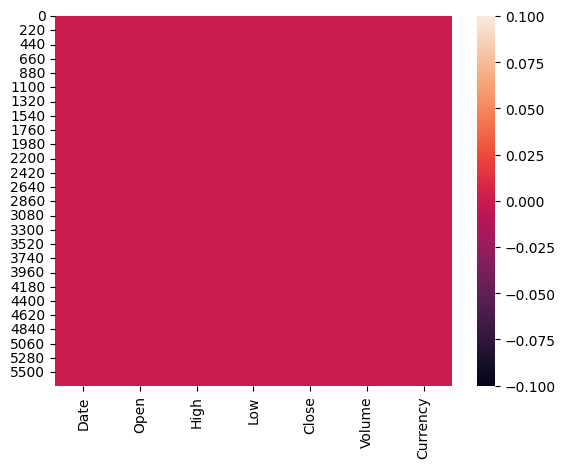

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,5708.000000,5708.000000,5708.000000,5708.000000,5708.000000
mean,15.913846,16.132912,15.671124,15.905674,42003.550981
std,8.503551,8.642820,8.336264,8.492578,32912.765504
min,4.020000,4.050000,4.015000,4.028000,0.000000
25%,7.648750,7.758750,7.565000,7.647500,16191.000000
50%,16.032500,16.227500,15.815000,16.048000,35335.500000
75%,19.865000,20.140000,19.620000,19.847250,59418.750000
max,48.490000,49.820000,47.550000,48.599000,355275.000000


<Axes: >

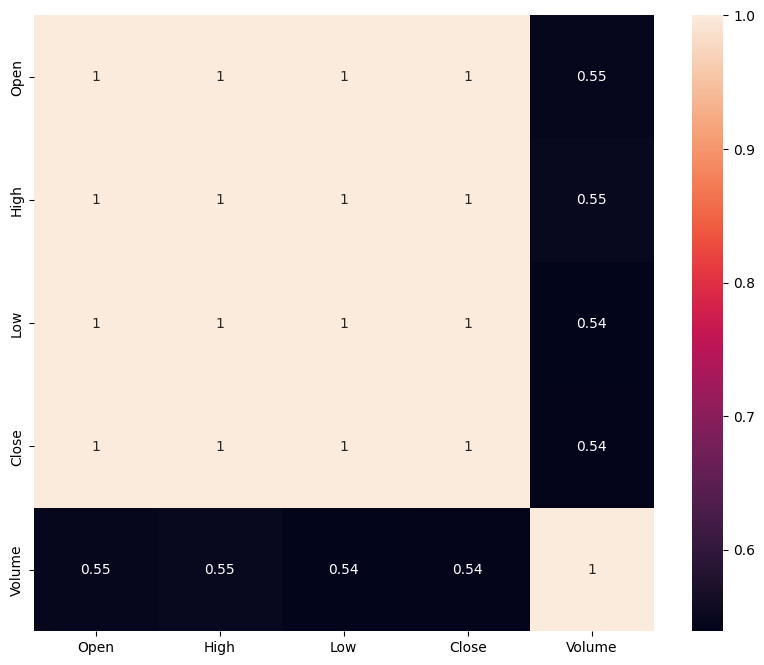

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

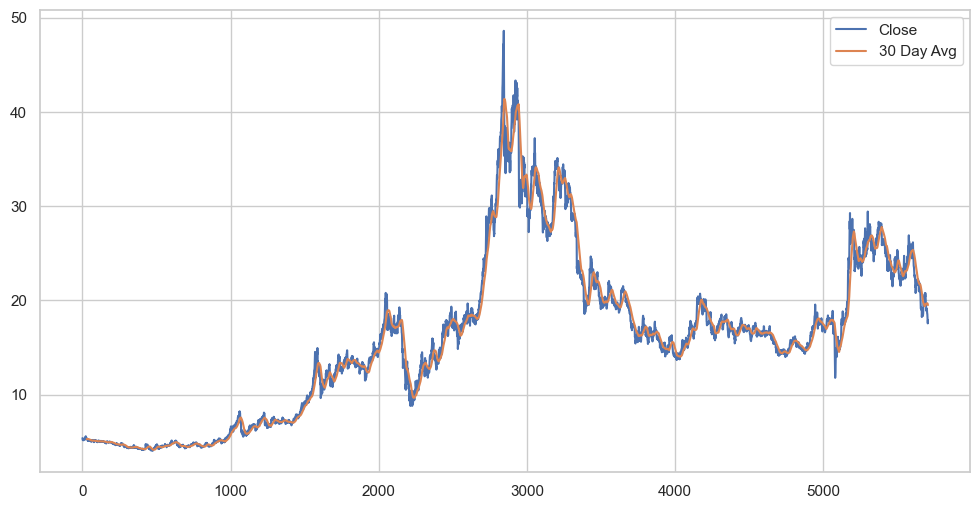

In [8]:
sns.set()
sns.set_style('whitegrid')
df['Close'].plot(figsize=(12,6),label='Close')
df['Close'].rolling(window=30).mean().plot(label='30 Day Avg')# Plotting the 
#rolling 30 day average against the Close Price
plt.legend()

# seleksi fitur

In [9]:
features = ['Open', 'High', 'Low', 'Volume']
x = df[features]
y = df['Close']
x.shape, y.shape

((5708, 4), (5708,))

# split data training dan data testing

In [10]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(1427,)

# membuat model regresi linier

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [12]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score*100)

akurasi model regresi linier =  99.96856930022454


# membuat inputan model regresi linier

In [17]:
#Open=5.42, High=5.42, Low=5.42, Volume=27560
input_data = np.array([[5.42,5.42,5.42, 27560]])

prediction = lr.predict(input_data)
print('Estimasi close silver :', prediction)

Estimasi close silver : [5.4152231]


c:\Users\hp5cd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [15]:
import pickle

filename = 'estimasi_silver.sav'
pickle.dump(lr,open(filename,'wb'))